In [2]:
%matplotlib inline


==============================
Rescale, resize, and downscale
==============================

`Rescale` operation resizes an image by a given scaling factor. The scaling
factor can either be a single floating point value, or multiple values - one
along each axis.

`Resize` serves the same purpose, but allows to specify an output image shape
instead of a scaling factor.

Note that when down-sampling an image, `resize` and `rescale` should perform
Gaussian smoothing to avoid aliasing artifacts. See the `anti_aliasing` and
`anti_aliasing_sigma` arguments to these functions.

`Downscale` serves the purpose of down-sampling an n-dimensional image by
integer factors using the local mean on the elements of each block of the size
factors given as a parameter to the function.




D:\anaconda\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


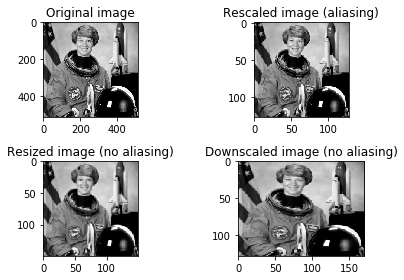

In [3]:
import matplotlib.pyplot as plt

from skimage import data, color  #color颜色空间转换
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())#color.rgb2gray将彩色图转换成灰度图

#尝试调用rescale函数缩放astronaut图片
#函数格式skimage.transform.rescale(image,scale[,...])scale参数可以是单个float数，表示缩放的倍数，也可以是float型的tuple[0.2,0.5],表示将行列数进行缩放
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
#尝试调用resize函数改变astronaut图片尺寸
#函数格式skimage.transform.resize(image,output_shape)image需要改变尺寸的图片 output_shape新的图片尺寸
image_resized=resize(image,(150,150))

#尝试调用downscale_local_mean函数缩小astronaut图片
image_downscaled=downscale_local_mean(image,(4,3))

fig, axes = plt.subplots(nrows=2, ncols=2)#把父图分成2*2个子图

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()